# Final Assignment
## CS154 Fall 2019
## Zainab Ahmed & Michelle S Lee

# Q1: Newton Fractals

## a) Newton's Method

Newton's Method to find roots uses the following iterative step:

$$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$$

In [2]:
def newton(x0, f, gf):
    x = x0
    maxiter = 1000
    for i in range(maxiter):
        #print("x{}: {}".format(i, x))
        if abs(f(x)-0) <= 1e-5:
            return(x)
        else:
            x -= f(x)/gf(x)
    return(float("inf")) # root not found

In [3]:
def f(x):
    return(x**2+1)

def gf(x):
    return(2*x)

In [6]:
newton(5 + 5j,f,gf)

(1.075899829699907e-11+1.0000000000145763j)

In [7]:
newton(5 - 5j,f,gf)

(1.075899829699907e-11-1.0000000000145763j)

The roots are $i$ and $-i$

## b) Range of Convergence

In [32]:
posCon = True
for b in np.linspace(0.0000001,1,1000):
    if abs(newton(b*1j,f,gf)-1j) > 1e-5:
        print("did not converge to 1j")
        print("val: ", b*1j)
        posCon = False
if posCon:
    print("All positive imaginary components converge to i")

All positive imaginary components converge to i


In [33]:
negCon = True
for b in np.linspace(0.0000001,1,1000):
    if abs(newton(-b*1j,f,gf)+1j) > 1e-5:
        print("did not converge to -1j")
        print("val: ", -b*1j)
        negCon = False
if negCon:
    print("All negative imaginary components converge to -i")

All negative imaginary components converge to -i


In [35]:
zeroDiv = True
for b in np.linspace(0.0000001,1,1000):
    if newton(b,f,gf) != float("inf"):
        print("real value converged")
        print("val: ", b)
        zeroDiv = False
if zeroDiv:
    print("All real value initial points diverge")

All real value initial points diverge


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Newton's method converges to $x_1(i)$ when the imaginary component of the initial value is positive.      
It converges to $x_2(-i)$ when the imaginary component of the initial value is negative.

It fails to converge when the imaginary component of the initial value is $0$ (intial value is a real number).

## c) Complex Roots
$$x^3-1$$

**Analytical Method**     

$$x^3-1 = 0$$
$$(x-1)(x^2+x+1)$$

Therefore the roots are at

$$x = 1$$
$$or$$
$$x = \frac{-1\pm \sqrt{1-4}}{2}$$

$$x = 1$$
$$or$$
$$x = -\frac{1+i\sqrt{3}}{2}$$
$$or$$
$$x = -\frac{1-i\sqrt{3}}{2}$$

**Numerical Method**    

In [13]:
def f2(x):
    return(x**3-1)

def gf2(x):
    return(3*x**2)

In [14]:
newton(0.1j,f2,gf2)

(1.0000000000035045-7.067308796863926e-11j)

In [11]:
newton(1j,f2,gf2)

(-0.49999999628902975+0.8660253983385868j)

In [12]:
newton(-1j,f2,gf2)

(-0.49999999628902975-0.8660253983385868j)

## d) Range of Convergence

In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt

sols = [[0]*100 for _ in range(100)]

x = np.linspace(-1,1,100)
for aind, a in enumerate(x):
    for bind, b in enumerate(x):
        sols[aind][bind] = newton(a+b*1j, f2,gf2)

In [56]:
x1 = 1
x2 = -(1+1j*math.sqrt(3))/2
x3 = -(1-1j*math.sqrt(3))/2

R = np.zeros([100,100])
G = np.zeros([100,100])
B = np.zeros([100,100])

for rind, r in enumerate(sols):
    for cind, v in enumerate(r):
        if abs(v-x1) < 1e-5:
            R[rind][cind] = 1
        elif abs(v-x2) < 1e-5:
            G[rind][cind] = 1
        elif abs(v-x3) < 1e-5:
            B[rind][cind] = 1

## e) Visualize

In [57]:
A = np.zeros([100,100,3])

A[:,:,0] = R
A[:,:,1] = G
A[:,:,2] = B

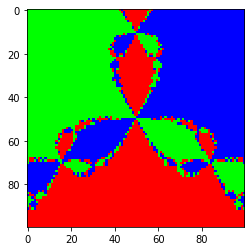

In [58]:
plt.imshow(A)

# Q2: Strange Attractors

## a) RK4

$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = rx-y-xz$$
$$\frac{dz}{dt} = xy-bz$$

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

#Differential equations of a Lorenz System
def X(x, y, s):
    return s * (y - x)

def Y(x, y, z, r):
    return (-x) * z + r * x - y

def Z(x, y, z, b):
    return x * y - b * z

#RK4 for the differential equations
def RK4(x, y, z, s, r, b, h):
    k_1 = X(x, y, s)
    l_1 = Y(x, y, z, r)
    m_1 = Z(x, y, z, b)

    k_2 = X((x + k_1 * h * 0.5), (y + l_1 * h * 0.5), s)
    l_2 = Y((x + k_1 * h * 0.5), (y + l_1 * h * 0.5), (z + m_1 * h * 0.5), r)
    m_2 = Z((x + k_1 * h * 0.5), (y + l_1 * h * 0.5), (z + m_1 * h * 0.5), b)

    k_3 = X((x + k_2 * h * 0.5), (y + l_2 * h * 0.5), s)
    l_3 = Y((x + k_2 * h * 0.5), (y + l_2 * h * 0.5), (z + m_2 * h * 0.5), r)
    m_3 = Z((x + k_2 * h * 0.5), (y + l_2 * h * 0.5), (z + m_2 * h * 0.5), b)

    k_4 = X((x + k_3 * h), (y + l_3 * h), s)
    l_4 = Y((x + k_3 * h), (y + l_3 * h), (z + m_3 * h), r)
    m_4 = Z((x + k_3 * h), (y + l_3 * h), (z + m_3 * h), b)

    x += (k_1 + 2 * k_2 + 2 * k_3 + k_4) * h * (1/6)
    y += (l_1 + 2 * l_2 + 2 * l_3 + l_4) * h * (1/6)
    z += (m_1 + 2 * m_2 + 2 * m_3 + m_4) * h * (1/6)

    return (x, y, z)

In [44]:
#Initial values and Parameters
x_0, y_0, z_0 = 0, 1, 0
s, b, h = 10, 8/3,0.01

pR = np.linspace(20,30,21)

for r in pR:
    vals = ["{0:.5f}".format(round(v,5)) for v in RK4(x_0, y_0, z_0, s, r, b, h)]
    r = round(r,1)
    print("r={}: ".format(r), vals)

r=20.0:  ['0.09500', '0.99968', '0.00048']
r=20.5:  ['0.09500', '0.99992', '0.00048']
r=21.0:  ['0.09501', '1.00016', '0.00048']
r=21.5:  ['0.09502', '1.00040', '0.00048']
r=22.0:  ['0.09503', '1.00064', '0.00048']
r=22.5:  ['0.09503', '1.00088', '0.00048']
r=23.0:  ['0.09504', '1.00112', '0.00048']
r=23.5:  ['0.09505', '1.00136', '0.00048']
r=24.0:  ['0.09506', '1.00161', '0.00048']
r=24.5:  ['0.09507', '1.00185', '0.00048']
r=25.0:  ['0.09507', '1.00209', '0.00048']
r=25.5:  ['0.09508', '1.00233', '0.00048']
r=26.0:  ['0.09509', '1.00257', '0.00048']
r=26.5:  ['0.09510', '1.00281', '0.00048']
r=27.0:  ['0.09511', '1.00305', '0.00048']
r=27.5:  ['0.09511', '1.00330', '0.00048']
r=28.0:  ['0.09512', '1.00354', '0.00048']
r=28.5:  ['0.09513', '1.00378', '0.00048']
r=29.0:  ['0.09514', '1.00402', '0.00048']
r=29.5:  ['0.09514', '1.00426', '0.00048']
r=30.0:  ['0.09515', '1.00450', '0.00048']


## b) Behavior

$$(x,y,z) = (1.2,1.3,1.6)$$
$$dt = 0.005$$

In [45]:
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


def lorenz(x, y, z, r, s=10, b=2.667):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.005
num_steps = 1000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (1.2, 1.3, 1.4)

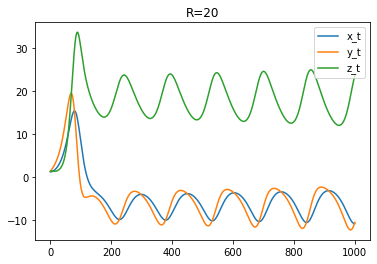

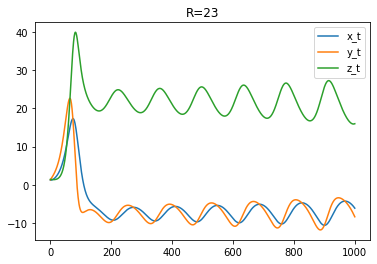

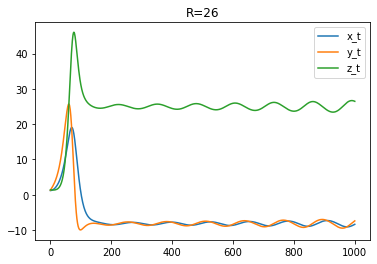

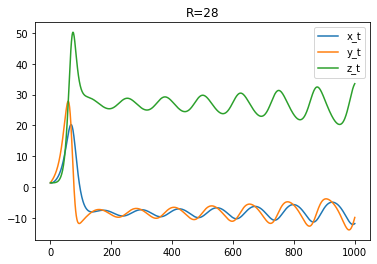

In [49]:
# Plot

for R in [20,23,26,28]:
    # Step through "time", calculating the partial derivatives at the current point
    # and using them to estimate the next point
    for i in range(num_steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i], r=R)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)

    plt.plot(xs,label= 'x_t')
    plt.plot(ys,label= 'y_t')
    plt.plot(zs,label= 'z_t') 
    plt.legend()
    plt.title('R={}'.format(R))
    plt.show()

From the plots above, the solutions of x(t), y(t) and z(t) tend to be approaching an equilibrium, for r = 20, 23 and 26. The trajectories  appear to be chaotic for an interval of time before approaching the equilibrium. 


## c) Parametric Plots

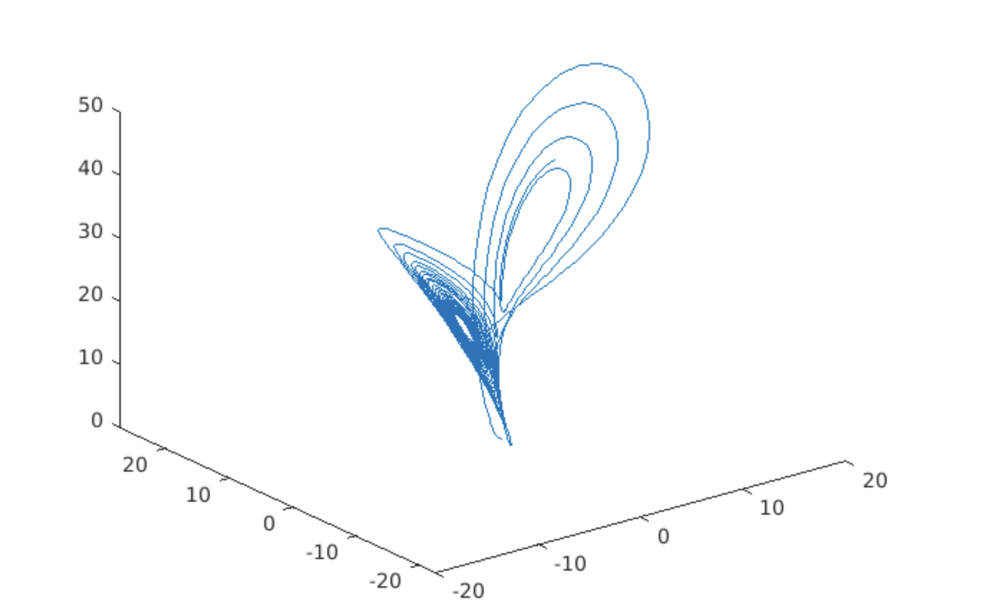

In [64]:
from IPython.display import display, Image
display(Image(filename='matlabplot.png'))

The attractor solution to the Lorenz system equations is shown in the three-dimensional phase space (X, Y,Z). The attractor is strange in that it has a fractal(non-integer) dimension.

## d) Specific Solutions and Evolution over Time

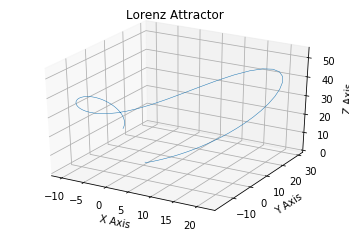

In [53]:
import numpy as np
dt = 0.01
num_steps = 100

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 0)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

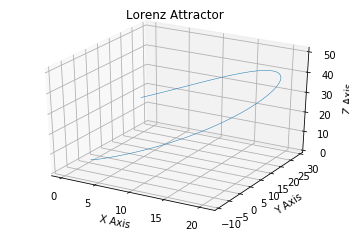

In [58]:
import numpy as np
dt = 0.005
num_steps = 100

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1.0000001, 0)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

The behavior of the solution is seen to be sensitive to initial conditions and this can be seen from the difference in the plots above due to the minute changes in the initial conditions.  Overtime the small perturbations in the initial conditions result in an emergent behavior where there is an almost orderly orbit around two main basins of attraction for when [x(0), y(0), z(0)] = [0, 1.0000001, 0]. This is shown in the plot below.

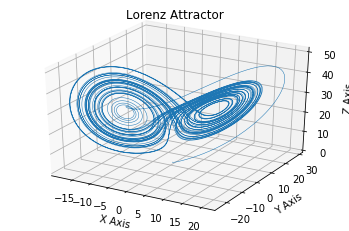

In [59]:
dt = 0.005
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0,1.0000001, 0)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

As opposed to the one main basin of attraction for when the initial conditions of [x(0), y(0), z(0)] = [0, 1., 0].


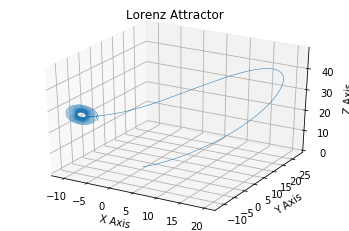

In [61]:
dt = 0.001
num_steps = 10000

# Need one more for the initial values
xs = np.empty(num_steps + 1)
ys = np.empty(num_steps + 1)
zs = np.empty(num_steps + 1)

# Set initial values
xs[0], ys[0], zs[0] = (0., 1., 0)

# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)


# Plot
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()


Finally, the system does seem to be bounded within a specific region of space, with the orbits never exactly repeats itself over a long period of time.

In the plots above, no equilibrium (dynamic or static) is ever reached – it does not form limit cycles or achieve a steady state. Thus, no trajectory ever coincides with any other thus an example of deterministic chaos. This explains to why it is sensitive to initial conditions,  because that no matter how close two different initial states are their trajectories will diverge eventually

# Q3: PDE Solver
$$u_{xx}+u_{yy} = 0$$

## a) Temperature on the Boundaries

$$u_{1,j} = 0$$
$$u_{N,j} = 0$$
$$u_{i,1} = 0$$
$$u_{i,N} = i^2-i$$

## b) Discrete Second Derivatives

$$u_{xx}(ih,jk) = \frac{\frac{u_{i-1,j}-u_{i,j}}{\Delta h} - \frac{u_{i,j} - u_{i+1,j}}{\Delta h}}{\Delta h} + O(\Delta h^2)$$

$$u_{xx}(ih,jk) = \frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta h^2} + O(\Delta h^2)$$

$$u_{yy}(ih,jk) = \frac{\frac{u_{i,j-1}-u_{i,j}}{\Delta k} - \frac{u_{i,j} - u_{i,j+1}}{\Delta k}}{\Delta k} + O(\Delta k^2)$$

$$u_{yy}(ih,jk) = \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta k^2} + O(\Delta k^2)$$


## c) Discretizing Laplace

$$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta h^2} + O(\Delta h^2) + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta h^2} + O(\Delta k^2) = 0$$

Assuming constant distances between intervals, $\Delta h  = \Delta k)$

$$\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{\Delta h^2} + O(\Delta h^2) + \frac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{\Delta h^2} + O(\Delta h^2) = 0$$

$$-4u_{i,j} + u_{i-1,j} + u_{i+1,j} + u_{i,j-1} + u_{i,j+1}= 0$$

## d) Matrix Equation

$$-4u_{2,2} + u_{1,2} + u_{3,2} + u_{2,1} + u_{2,3}= 0$$
$$-4u_{2,3} + u_{1,3} + u_{3,3} + u_{2,2} + u_{2,4}= 0$$
$$-4u_{3,2} + u_{2,2} + u_{4,2} + u_{3,1} + u_{3,3}= 0$$
$$-4u_{3,3} + u_{2,3} + u_{4,3} + u_{3,2} + u_{3,4}= 0$$

Subbing in boundary values

$$-4u_{2,2} + 0 + u_{3,2} + 0 + u_{2,3}= 0$$
$$-4u_{2,3} + 0 + u_{3,3} + u_{2,2} + (2^2-2)= 0$$
$$-4u_{3,2} + u_{2,2} + 0 + 0 + u_{3,3}= 0$$
$$-4u_{3,3} + u_{2,3} + 0 + u_{3,2} + (3^2-3)= 0$$

Rearranging

$$-4u_{2,2} + u_{2,3} + u_{3,2} + 0 = 0$$
$$u_{2,2} - 4u_{2,3} + 0 + u_{3,3} = -2$$
$$u_{2,2} + 0 - 4u_{3,2}+ u_{3,3} = 0$$
$$0 + u_{2,3} + u_{3,2} - 4u_{3,3} = -6$$

$$\begin{bmatrix}
-4 & 1 & 1 & 0\\
1 & -4 & 0 & 1\\
1 & 0 & -4 & 1\\
0 & 1 & 1 & -4
\end{bmatrix}\begin{bmatrix}
u_2^2\\
u_2^3\\
u_3^2\\
u_3^3
\end{bmatrix} = \begin{bmatrix}
0\\
-2\\
0\\
-6
\end{bmatrix}$$

## e) Solution

In [17]:
import numpy as np
A = np.matrix([[-4,1,1,0],[1,-4,0,1],[1,0,-4,1],[0,1,1,-4]])
b = np.matrix([[0,-2,0,6]]).T
x = np.linalg.solve(A,b)

In [18]:
print(A@x)

[[ 2.77555756e-17]
 [-2.00000000e+00]
 [ 2.22044605e-16]
 [ 6.00000000e+00]]


In [19]:
print(x)

[[-0.08333333]
 [ 0.08333333]
 [-0.41666667]
 [-1.58333333]]


Thus, the solution is 
$$\begin{bmatrix}
u_2^2\\
u_2^3\\
u_3^2\\
u_3^3
\end{bmatrix} = \begin{bmatrix}
-0.0833\\
0.0833\\
-0.417\\
-1.583
\end{bmatrix}$$

# Q4: Laplace Transform
$$L{f}(s) = \int_0^\infty e^{-st}f(t) dt$$

## a) Linear Operator

An operator is linear if it meets the following conditions:

1) $L(a*x) = a*L(x)$             
2) $L(x + x') = L(x) + L(x')$             

**Proving (1)**       
$$L(a*x) = \int_0^\infty e^{-sf}a*f(t) dt$$  
Because $a$ is a scalar that is not dependent on variable $t$
$$L(a*x) = a\int_0^\infty e^{-sf}f(t) dt$$  
Thus,
$$L(a*x) = a*L(x)$$

**Proving (2)**       
$$L(x + x') = \int_0^\infty e^{-sf}(f(x)+f(x)) dt$$  
$$L(x + x') = \int_0^\infty e^{-sf}f(x) + e^{-sf}f(x') dt$$  
$$L(x + x') = \int_0^\infty e^{-sf}f(x)dt + \int_0^\infty e^{-sf}f(x')dt$$  
Thus,
$$L(x + x') = L(x) + L(x')$$

Thus since the Laplace Transform satisfies all characteristics, it is a linear operator.

## b) Existence

The function $f(t)$ must always be integratable for the Laplace transform to exist (The result of the Laplace Transform must exist).

Thus, the function must be continuous in the positive domain (from $0$ to $\infty$).

Additionally, $\int_0^\infty e^{-st}f(t) dt < \infty$.

Thus, any function that has infinity on a positive real number cannot have a Laplace transform. For example ( $tan(x)$ or $\frac{1}{x}$ )

Additionally, a function that has an order of growth too large for the damping factor $e^{-st}$ (ex: $e^{e^t}$) will not have a convergent integral (integral results in $\infty$). Thus, the function must have an order of growth less than or equal to exponential.

In summary, for a function $f(t)$ to have a Laplace transform, it must be expressible in the form $Ce^{kt}$ where $C$ and $k$ are scalar values.

## c) Step Function

$$u(t) = \left\{
\begin{array}{ll}
      1 & t \geq 0 \\
      0 & otherwise
\end{array} 
\right.$$

$$L{u}(t) = \int_0^\infty e^{-st}(1) dt$$
$$L{u}(t) = \frac{e^{-st}}{-s} \bigg\rvert_0^\infty$$
$$L{u}(t) = \frac{e^{-s(\infty)}}{-s} - \frac{e^{-s(0)}}{-s}$$

For this function to converge, the term including infinity needs to go to $0$. Thus $$s > 0$$

Given this constraint,

$$L{u}(t) = - \frac{1}{-s}$$
$$L{u}(t) = \frac{1}{s}$$

## d) LT of Derivative

$$Y(s) = \int_0^\infty e^{-st}y'(t) dt$$

$$L(y'(t)) = \int_0^\infty e^{-st}y(t) dt$$
Using integration by parts, we can rewrite this as:         
$$= y(t)e^{-st}\bigg\rvert_0^\infty + s\int_0^\infty y(t)e^{-st} dt$$
$$= y(\infty)e^{-s(\infty)}- y(0)e^{-s(0)}+ s\int_0^\infty y(t)e^{-st} dt$$

Assuming that the Laplace transform exists for function $y(t)$, we know that $y(\infty)e^{-s(\infty)} = 0$. Thus,
$$=  -y(0)+ s\int_0^\infty y(t)e^{-st} dt$$


Simplified, this becomes
$$L(y'(t)) =  -y(0)+ sY(s)$$


## e) IVP

$$y'+ y=u(t)$$
$$y(0) = 1$$

Taking the Laplace transform of both sides of equation 1
$$-y(0)+sY(s) + Y(s) = \frac{e^{-s}}{s}$$

Subbing in the value for $y(0)$ and rearranging:
$$Y(s) = (\frac{e^{-s}}{s} + 1)/(s+1)$$


## g) Advatage of LT for ODE

It transforms calculus problems (involving differentials and integration) into algebra problems (additions and coefficients). 

This makes ODEs much easier to solve when they are expressed in the transformed versions of themselves.

# 5. Reflection

I've learnt how useful it is to use mathematical models to represent (or approximate) a system.
In doing so, we can study how the system behaves over the different variables. This can be used to make inferences, predictions, or art.

We can do so by writing down how different agents (variables) are related (equations), or how changing some agents affects others (differential equations). Sometimes it is easier or only possible to write the former or the latter.

To move things from the physical world to the math world, we sometimes need dimensional analysis.

Of course, noting down relationships and converting them into solvable systems of equations is easier said than done. Sometimes, we can instead make really good guesses by doing a lot of simpler calculations that create really good approximations (numerical analysis). But in doing so we need to watch out for quirks in how a computer remembers numbers and does calculations, some numbers will be too small or too large for even a computer to work with (numerical implementation). 

Interestingly, I've also learnt that even within the math world there are different possible representations (subworlds) that can be translatable between each other. For example: cartesian to polar coordinates; complex numbers and sinusoids; normal equations and the Fourier/ Laplace transforms. Knowing about these different subworlds of math and how to move things between them is important, because some things are much simpler to express/ work with in some worlds than others.